In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load data
file_path = '/Users/siddharth/Desktop/BigData_Project/coinbase_data/cassandra data.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,id,amount,base_currency,target_currency,timestamp
0,a95ef317-d8f8-4316-b2b4-278d27677ab2,0.000028,SHIB,USD,2024-12-15T11:58:18.114-05:00
1,2ac4c4ce-7ce5-4454-ab11-daca95e71c17,717.385860,BNB,USD,2024-12-14T21:58:26.710-05:00
2,0a734672-e3a1-4314-935e-3efc00518431,1.000255,USDT,USD,2024-12-12T06:37:36.044-05:00
3,fa53df38-12b1-466e-942b-a6bd1077b1c7,117.550000,LTC,USD,2024-12-15T08:16:12.354-05:00
4,aa604070-bdcc-475d-9435-75ccafdbb7c7,119.125000,LTC,USD,2024-12-14T09:33:27.579-05:00


In [4]:
# Convert timestamp column to datetime and sort data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

In [5]:
df.head()

,id,amount,base_currency,target_currency,timestamp
13475,db4d36da-a28a-41d1-bd8c-1960a8d3e27a,100933.625,BTC,USD,2024-12-12 04:28:42.781000-05:00
46885,17ad2b67-5dd6-41e1-a182-83b1019b2f46,100957.484,BTC,USD,2024-12-12 04:28:42.781000-05:00
39039,c356854c-1a06-4999-ad1d-4e27e35e265a,101025.010,BTC,USD,2024-12-12 04:29:37.693000-05:00
122424,dab43083-5e98-49af-937c-a190257b3ff8,101026.600,BTC,USD,2024-12-12 04:29:47.790000-05:00
237488,f3ceec2e-44d1-4a1c-80f3-19a9d12df8a5,101026.600,BTC,USD,2024-12-12 04:29:57.927000-05:00


In [6]:
# Filter BTC data
btc_df = df[df['base_currency'] == 'BTC'][['timestamp', 'amount']]
btc_df = btc_df.set_index('timestamp')

In [7]:
# Moving Average Smoothing
window_size = 5
btc_df['moving_avg'] = btc_df['amount'].rolling(window=window_size).mean()

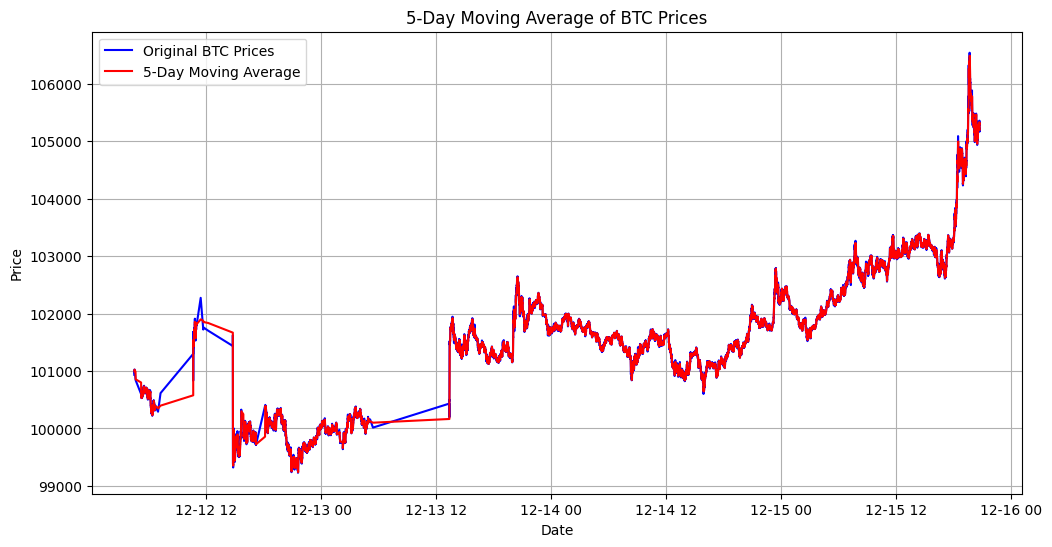

In [8]:
# Plot Moving Average
plt.figure(figsize=(12, 6))
plt.plot(btc_df['amount'], label='Original BTC Prices', color='blue')
plt.plot(btc_df['moving_avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.title(f'{window_size}-Day Moving Average of BTC Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

/Users/siddharth/Desktop/BigData_Project/bigdata/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


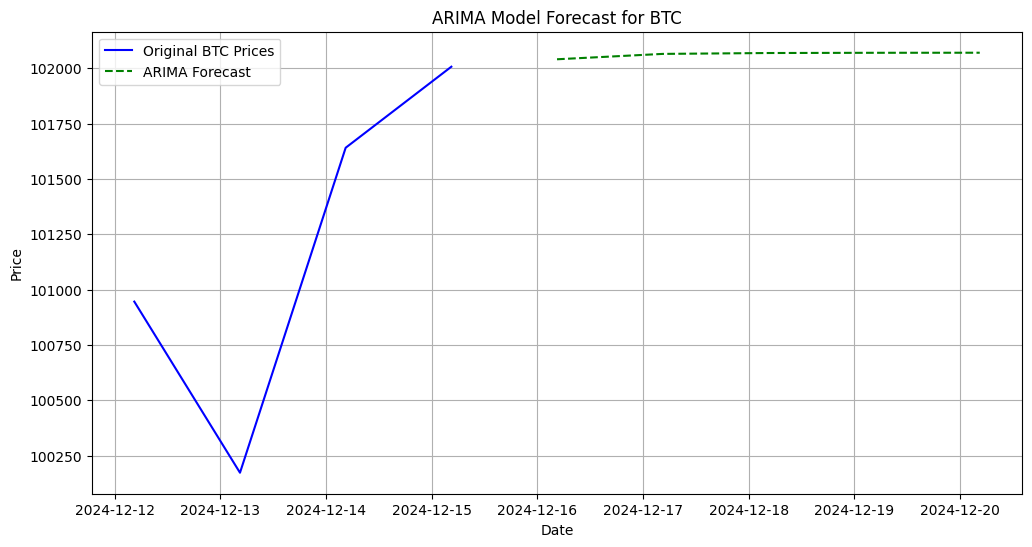

Forecasted BTC Prices:
                                                             Date  \
2024-12-16 04:28:42.781000-05:00 2024-12-16 04:28:42.781000-05:00   
2024-12-17 04:28:42.781000-05:00 2024-12-17 04:28:42.781000-05:00   
2024-12-18 04:28:42.781000-05:00 2024-12-18 04:28:42.781000-05:00   
2024-12-19 04:28:42.781000-05:00 2024-12-19 04:28:42.781000-05:00   
2024-12-20 04:28:42.781000-05:00 2024-12-20 04:28:42.781000-05:00   

                                  Forecasted_Price  
2024-12-16 04:28:42.781000-05:00     102040.769525  
2024-12-17 04:28:42.781000-05:00     102065.075177  
2024-12-18 04:28:42.781000-05:00     102069.040065  
2024-12-19 04:28:42.781000-05:00     102070.048960  
2024-12-20 04:28:42.781000-05:00     102070.377135  


In [22]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load BTC data
file_path = '/Users/siddharth/Desktop/BigData_Project/coinbase_data/cassandra data.csv'
df = pd.read_csv(file_path)

# Convert timestamp column to datetime and filter BTC
df['timestamp'] = pd.to_datetime(df['timestamp'])
btc_df = df[df['base_currency'] == 'BTC'][['timestamp', 'amount']]

# Remove duplicates by aggregating on the 'timestamp'
btc_df = btc_df.groupby('timestamp').mean().sort_index()

# Set frequency for the datetime index (auto-detect or enforce)
btc_df = btc_df.asfreq('D', method='pad')  # Use 'D' for daily frequency and forward-fill missing values

# Train ARIMA model
model = ARIMA(btc_df['amount'].dropna(), order=(5, 1, 0))  # ARIMA(5,1,0)
results = model.fit()

# Forecast future prices
forecast_steps = 5
forecast = results.forecast(steps=forecast_steps)

# Generate correct datetime index for forecasts
forecast_index = pd.date_range(start=btc_df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(btc_df['amount'], label='Original BTC Prices', color='blue')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='green', linestyle='--')
plt.title('ARIMA Model Forecast for BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print("Forecasted BTC Prices:")
print(pd.DataFrame({'Date': forecast_index, 'Forecasted_Price': forecast}))

/var/folders/54/pgn3cgb13jg85lj327lqbjpm0000gn/T/ipykernel_64676/4194078946.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  btc_df = btc_df.resample('H').mean().ffill()
/var/folders/54/pgn3cgb13jg85lj327lqbjpm0000gn/T/ipykernel_64676/4194078946.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=btc_df.index[-1], periods=forecast_steps + 1, freq='H')[1:]


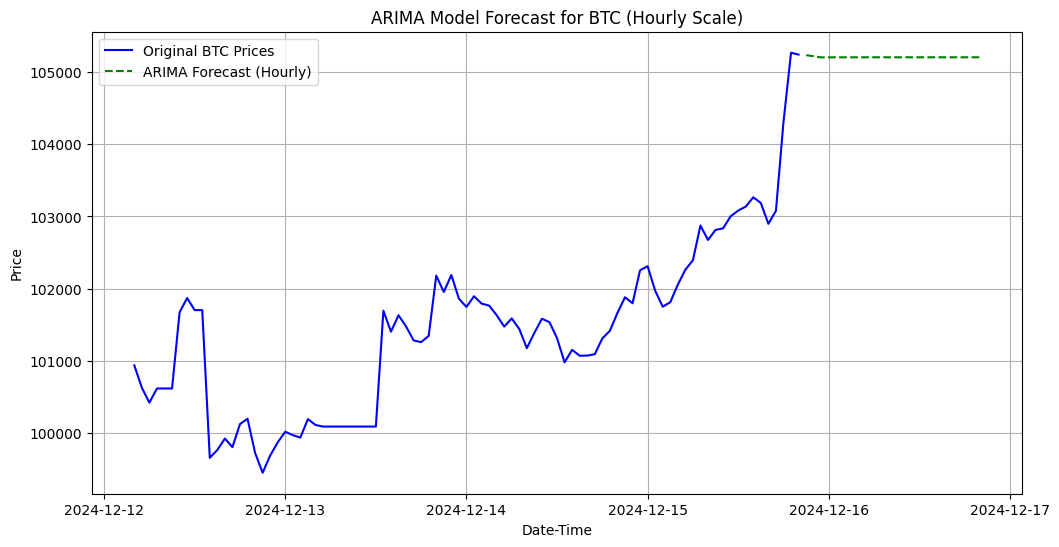

Forecasted BTC Prices (Hourly):
                                          Date-Time  Forecasted_Price
2024-12-15 21:00:00-05:00 2024-12-15 21:00:00-05:00     105235.979587
2024-12-15 22:00:00-05:00 2024-12-15 22:00:00-05:00     105222.185592
2024-12-15 23:00:00-05:00 2024-12-15 23:00:00-05:00     105205.536339
2024-12-16 00:00:00-05:00 2024-12-16 00:00:00-05:00     105206.628386
2024-12-16 01:00:00-05:00 2024-12-16 01:00:00-05:00     105206.927957
2024-12-16 02:00:00-05:00 2024-12-16 02:00:00-05:00     105207.018789
2024-12-16 03:00:00-05:00 2024-12-16 03:00:00-05:00     105207.314222
2024-12-16 04:00:00-05:00 2024-12-16 04:00:00-05:00     105207.287184
2024-12-16 05:00:00-05:00 2024-12-16 05:00:00-05:00     105207.278425
2024-12-16 06:00:00-05:00 2024-12-16 06:00:00-05:00     105207.279765
2024-12-16 07:00:00-05:00 2024-12-16 07:00:00-05:00     105207.274437
2024-12-16 08:00:00-05:00 2024-12-16 08:00:00-05:00     105207.274980
2024-12-16 09:00:00-05:00 2024-12-16 09:00:00-05:00     10

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load BTC data
file_path = '/Users/siddharth/Desktop/BigData_Project/coinbase_data/cassandra data.csv'
df = pd.read_csv(file_path)

# Convert timestamp column to datetime and filter BTC
df['timestamp'] = pd.to_datetime(df['timestamp'])
btc_df = df[df['base_currency'] == 'BTC'][['timestamp', 'amount']]

# Remove duplicates by aggregating on the 'timestamp'
btc_df = btc_df.groupby('timestamp').mean().sort_index()

# Resample the data to an hourly frequency, forward-filling missing values
btc_df = btc_df.resample('H').mean().ffill()

# Train ARIMA model
model = ARIMA(btc_df['amount'].dropna(), order=(5, 1, 0))  # ARIMA(5,1,0)
results = model.fit()

# Forecast future prices
forecast_steps = 24  # Forecast next 24 hours
forecast = results.forecast(steps=forecast_steps)

# Generate correct datetime index for forecasts
forecast_index = pd.date_range(start=btc_df.index[-1], periods=forecast_steps + 1, freq='H')[1:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(btc_df['amount'], label='Original BTC Prices', color='blue')
plt.plot(forecast_index, forecast, label='ARIMA Forecast (Hourly)', color='green', linestyle='--')
plt.title('ARIMA Model Forecast for BTC (Hourly Scale)')
plt.xlabel('Date-Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print("Forecasted BTC Prices (Hourly):")
print(pd.DataFrame({'Date-Time': forecast_index, 'Forecasted_Price': forecast}))

/Users/siddharth/Desktop/BigData_Project/bigdata/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


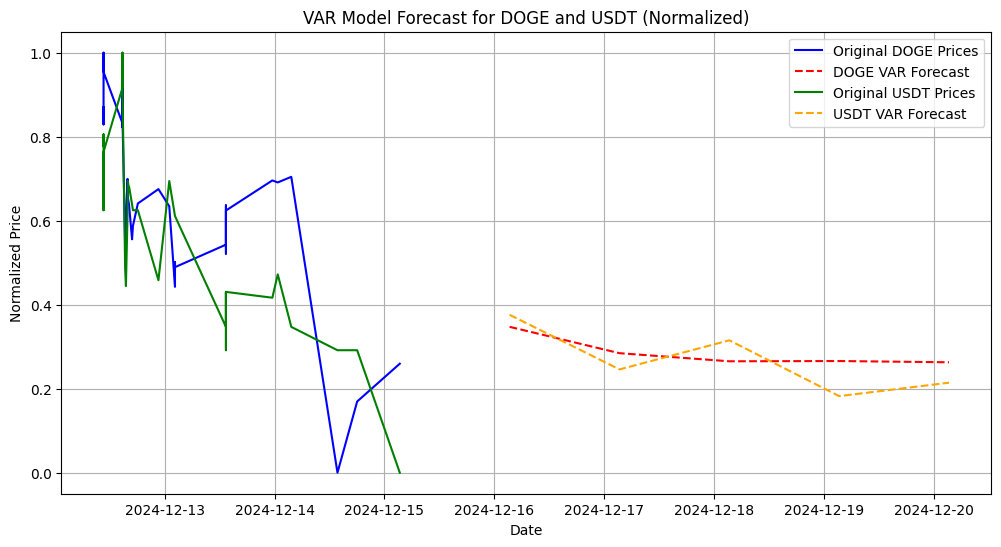

VAR Model Forecasted DOGE and USDT Prices (Normalized):
                                      DOGE      USDT
2024-12-16 03:21:27.818000-05:00  0.347337  0.375922
2024-12-17 03:21:27.818000-05:00  0.284635  0.245942
2024-12-18 03:21:27.818000-05:00  0.265320  0.315285
2024-12-19 03:21:27.818000-05:00  0.265924  0.182367
2024-12-20 03:21:27.818000-05:00  0.262951  0.214337


In [26]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load DOGE and USDT data
file_path = '/Users/siddharth/Desktop/BigData_Project/coinbase_data/cassandra data.csv'
df = pd.read_csv(file_path)

# Convert timestamp column to datetime and sort data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Filter DOGE and USDT data
doge_df = df[df['base_currency'] == 'DOGE'][['timestamp', 'amount']].rename(columns={'amount': 'DOGE'})
usdt_df = df[df['base_currency'] == 'USDT'][['timestamp', 'amount']].rename(columns={'amount': 'USDT'})

# Merge DOGE and USDT data
merged_df = pd.merge(doge_df, usdt_df, on='timestamp', how='inner').set_index('timestamp')

# Normalize the data for better visualization
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns, index=merged_df.index)

# Train VAR model on normalized data
model = VAR(scaled_data)
results = model.fit(maxlags=5)

# Forecast future prices
forecast_steps = 5
forecast = results.forecast(scaled_data.values[-5:], steps=forecast_steps)

# Prepare forecasted data
forecast_df = pd.DataFrame(forecast, columns=['DOGE', 'USDT'])
forecast_df.index = pd.date_range(start=scaled_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.index, scaled_data['DOGE'], label='Original DOGE Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['DOGE'], label='DOGE VAR Forecast', color='red', linestyle='--')
plt.plot(scaled_data.index, scaled_data['USDT'], label='Original USDT Prices', color='green')
plt.plot(forecast_df.index, forecast_df['USDT'], label='USDT VAR Forecast', color='orange', linestyle='--')
plt.title('VAR Model Forecast for DOGE and USDT (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print("VAR Model Forecasted DOGE and USDT Prices (Normalized):")
print(forecast_df)

/Users/siddharth/Desktop/BigData_Project/bigdata/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


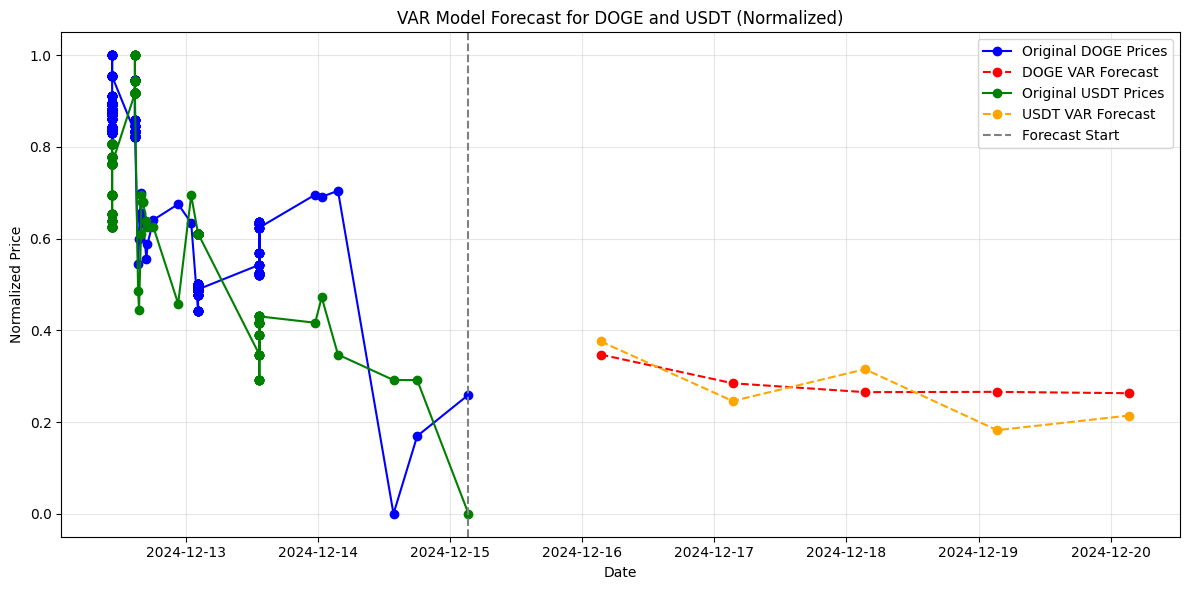

VAR Model Forecasted DOGE and USDT Prices (Normalized):
                                      DOGE      USDT
2024-12-16 03:21:27.818000-05:00  0.347337  0.375922
2024-12-17 03:21:27.818000-05:00  0.284635  0.245942
2024-12-18 03:21:27.818000-05:00  0.265320  0.315285
2024-12-19 03:21:27.818000-05:00  0.265924  0.182367
2024-12-20 03:21:27.818000-05:00  0.262951  0.214337


In [28]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load DOGE and USDT data
file_path = '/Users/siddharth/Desktop/BigData_Project/coinbase_data/cassandra data.csv'
df = pd.read_csv(file_path)

# Convert timestamp column to datetime and sort data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Filter DOGE and USDT data
doge_df = df[df['base_currency'] == 'DOGE'][['timestamp', 'amount']].rename(columns={'amount': 'DOGE'})
usdt_df = df[df['base_currency'] == 'USDT'][['timestamp', 'amount']].rename(columns={'amount': 'USDT'})

# Merge DOGE and USDT data
merged_df = pd.merge(doge_df, usdt_df, on='timestamp', how='inner').set_index('timestamp')

# Normalize the data
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=['DOGE', 'USDT'], index=merged_df.index)

# Train VAR model on normalized data
model = VAR(normalized_df)
results = model.fit(maxlags=5)

# Forecast future prices
forecast_steps = 5
forecast = results.forecast(normalized_df.values[-5:], steps=forecast_steps)

# Prepare forecasted data
forecast_df = pd.DataFrame(forecast, columns=['DOGE', 'USDT'])
forecast_df.index = pd.date_range(start=normalized_df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['DOGE'], label='Original DOGE Prices', color='blue', marker='o')
plt.plot(forecast_df.index, forecast_df['DOGE'], label='DOGE VAR Forecast', color='red', linestyle='--', marker='o')
plt.plot(normalized_df.index, normalized_df['USDT'], label='Original USDT Prices', color='green', marker='o')
plt.plot(forecast_df.index, forecast_df['USDT'], label='USDT VAR Forecast', color='orange', linestyle='--', marker='o')

# Add vertical line to indicate the forecast start point
plt.axvline(x=normalized_df.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Enhance plot aesthetics
plt.title('VAR Model Forecast for DOGE and USDT (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(alpha=0.3)  # Add transparent gridlines
plt.tight_layout()
plt.show()

# Display forecasted values
print("VAR Model Forecasted DOGE and USDT Prices (Normalized):")
print(forecast_df)